<a href="https://colab.research.google.com/github/i-nitishh/Deep-Learning/blob/Cat-and-Dog-Classificaton-Transfer-Learning/Cat_and_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [61]:
!kaggle datasets download -d tongpython/cat-and-dog

cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [62]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Dense, Dropout , Conv2D , GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator


In [64]:
## Making a Base Model from MobileNet

In [65]:
base_model = MobileNet(weights = 'imagenet' , include_top =False )

In [66]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                         

In [67]:
## Modifing our Base Model as per our requirements

In [68]:
classes =2
x= base_model.output
x= GlobalAveragePooling2D(name ='avg_pool')(x)
x = Dropout(0.4)(x)
prediction = Dense(2,activation = 'softmax')(x)
model = Model(inputs = base_model.input , outputs =prediction)

In [69]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

In [70]:
for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer = 'adam' , loss ='categorical_crossentropy' , metrics = ['accuracy'])

In [71]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

In [72]:
import os                    ## Getting no of categories for out problem statement
os.listdir('training_set/training_set')

['cats', 'dogs']

In [73]:
width = 299
height = 299
batch = 32
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range =40,
    width_shift_range = 0.2,
    height_shift_range =0.2,
    shear_range =0.2,
    zoom_range = 0.2,
    horizontal_flip =True,
    fill_mode = 'nearest'
     )

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range =40,
    width_shift_range = 0.2,
    height_shift_range =0.2,
    shear_range =0.2,
    zoom_range = 0.2,
    horizontal_flip =True,
    fill_mode = 'nearest'
     )

In [74]:
train_generator = train_datagen.flow_from_directory(
    train_dir ,
    target_size =(height , width),
    batch_size = batch,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir ,
    target_size =(height , width),
    batch_size = batch,
    class_mode = 'categorical'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [75]:
data = next(train_generator)

In [76]:
steps_per_epoch = train_generator.n//train_generator.batch_size
steps_per_epoch

250

In [77]:
model.fit(train_generator , epochs =5 , validation_data = test_generator , steps_per_epoch =steps_per_epoch,  verbose =1)

Epoch 1/5
250/250 [==============================] - 224s 889ms/step - loss: 0.2365 - accuracy: 0.9007 - val_loss: 0.1024 - val_accuracy: 0.9614
Epoch 2/5
250/250 [==============================] - 220s 880ms/step - loss: 0.1118 - accuracy: 0.9566 - val_loss: 0.0730 - val_accuracy: 0.9748
Epoch 3/5
250/250 [==============================] - 220s 882ms/step - loss: 0.0986 - accuracy: 0.9595 - val_loss: 0.0629 - val_accuracy: 0.9822
Epoch 4/5
250/250 [==============================] - 259s 1s/step - loss: 0.0912 - accuracy: 0.9636 - val_loss: 0.0616 - val_accuracy: 0.9778
Epoch 5/5
250/250 [==============================] - 220s 880ms/step - loss: 0.0846 - accuracy: 0.9661 - val_loss: 0.0596 - val_accuracy: 0.9773


In [78]:
img = keras.utils.load_img('/content/t.jpg',target_size =(299,299))

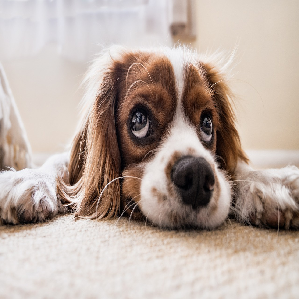

In [79]:
img

In [80]:
img = keras.utils.img_to_array(img)

In [81]:
img.shape

(299, 299, 3)

In [82]:
img = preprocess_input(img)

In [83]:
x = np.expand_dims(img,axis = 0)

In [84]:
x.shape

(1, 299, 299, 3)

In [85]:
pred = model.predict(x)

1/1 [==============================] - 0s 392ms/step


In [86]:
pred

array([[0.00136333, 0.99863666]], dtype=float32)